Integrantes: Jose Aynaya(Lider),
             Vania Palacios,
             Dante Vilches

In [ ]:
# Montar Google Drive\
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Cargamos los datos desde el archivo CSV proporcionado
file_path = '/content/drive/MyDrive/MLPrueba/bank-additional-full.csv'
df = pd.read_csv(file_path, sep=';')  # Asumiendo separador ';' como común en CSV europeos

# Muestra las primeras filas del conjunto de datos para entender la estructura y las columnas
df.head(), df.info(), df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(   age        job  marital    education  default housing loan    contact  \
 0   56  housemaid  married     basic.4y       no      no   no  telephone   
 1   57   services  married  high.school  unknown      no   no  telephone   
 2   37   services  married  high.school       no     yes   no  telephone   
 3   40     admin.  married     basic.6y       no      no   no  telephone   
 4   56   services  married  high.school       no      no  yes  telephone   
 
   month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
 0   may         mon  ...         1    999         0  nonexistent          1.1   
 1   may         mon  ...         1    999         0  nonexistent          1.1   
 2   may         mon  ...         1    999         0  nonexistent          1.1   
 3   may         mon  ...         1    999         0  nonexistent          1.1   
 4   may         mon  ...         1    999         0  nonexistent          1.1   
 
    cons.price.idx  cons.conf.idx  euribor

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns

# PASO 1
1.	Eliminar duplicados y mostrar descripción de las catacteristicas

In [ ]:
# Eliminar duplicados
data_cleaned = df.drop_duplicates()

# Comprobar cuántos duplicados fueron eliminados
duplicates_removed = df.shape[0] - data_cleaned.shape[0]

# Buscar valores nulos
null_values = data_cleaned.isnull().sum()

duplicates_removed, null_values

# Análisis descriptivo para variables numéricas
numerical_descriptive = data_cleaned.describe()

# Análisis de variables categóricas: visualizar la frecuencia de categorías
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns
categorical_descriptive = {column: data_cleaned[column].value_counts() for column in categorical_columns}

numerical_descriptive, categorical_descriptive

(               age      duration      campaign         pdays      previous  \
 count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
 mean      40.02380    258.315815      2.567879    962.464810      0.173013   
 std       10.42068    259.305321      2.770318    186.937102      0.494964   
 min       17.00000      0.000000      1.000000      0.000000      0.000000   
 25%       32.00000    102.000000      1.000000    999.000000      0.000000   
 50%       38.00000    180.000000      2.000000    999.000000      0.000000   
 75%       47.00000    319.000000      3.000000    999.000000      0.000000   
 max       98.00000   4918.000000     56.000000    999.000000      7.000000   
 
        emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
 count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
 mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
 std        1.570883        0.578839     

2. Detección de anomalías en variables

<ipython-input-6-c349c02b7e5d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned[col], ax=axes[i], palette="vlag")
<ipython-input-6-c349c02b7e5d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned[col], ax=axes[i], palette="vlag")
<ipython-input-6-c349c02b7e5d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_cleaned[col], ax=axes[i], palette="vlag")
<ipython-input-6-c349c02b7e5d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

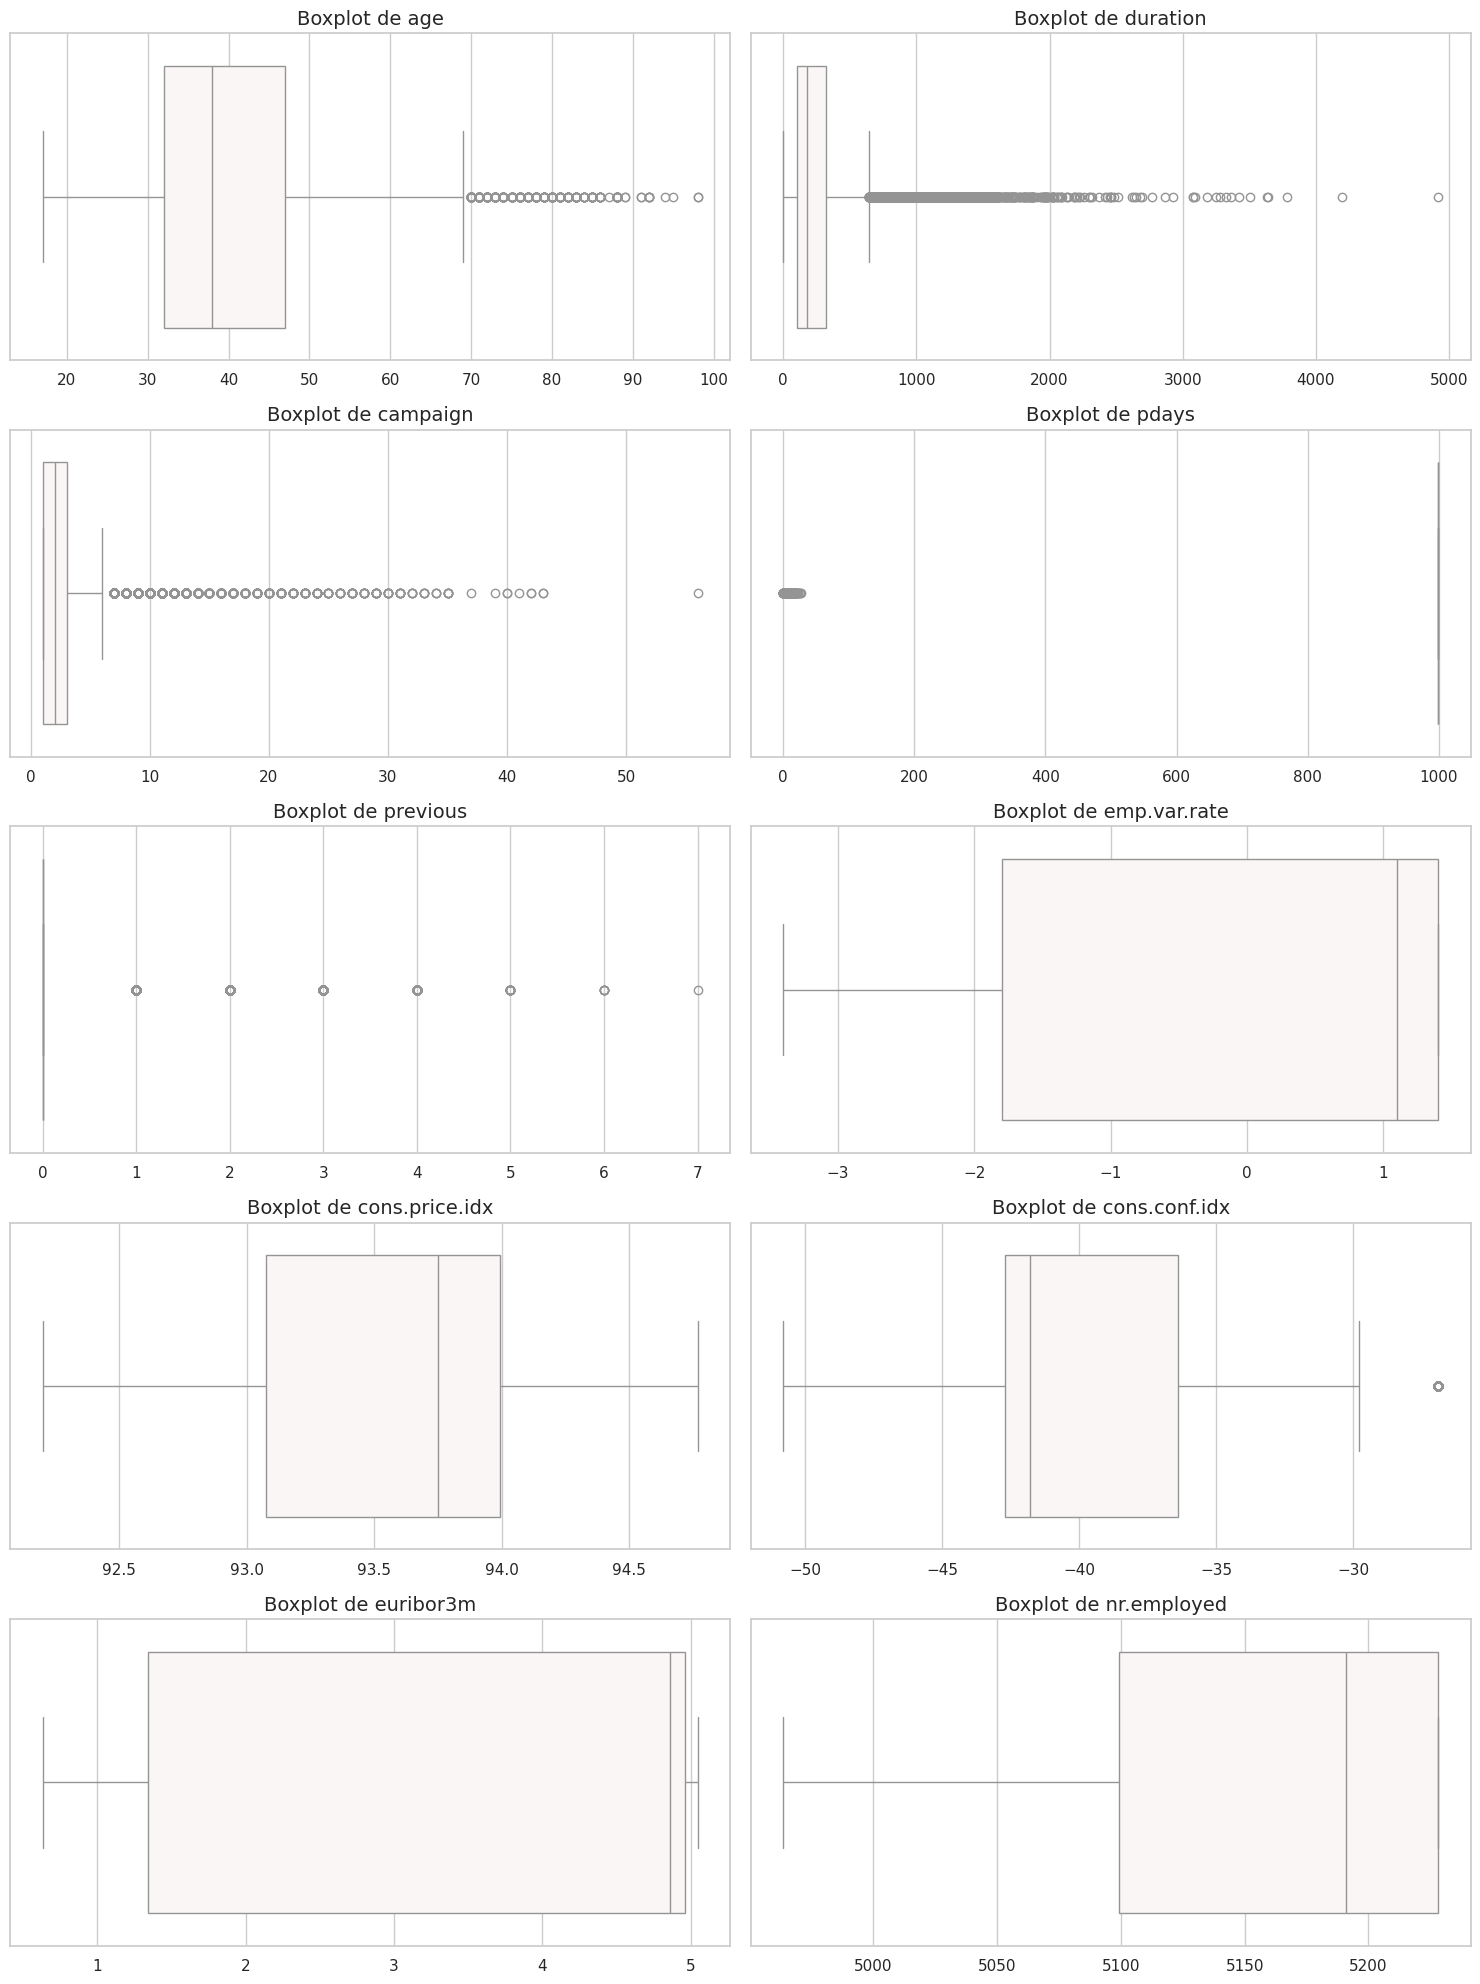

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
sns.set(style="whitegrid")

# Variables numéricas para el análisis de valores atípicos
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Crear gráficos de caja para identificar valores atípicos en las variables numéricas
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=data_cleaned[col], ax=axes[i], palette="vlag")
    axes[i].set_title(f'Boxplot de {col}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Codificar la variable de salida 'y' como 0 y 1
df['y'] = df['y'].map({'no': 0, 'yes': 1})

# Seleccionar las variables categóricas para la codificación one-hot
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Aplicar la codificación one-hot a las variables categóricas
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True, dtype=int)

# Mostrar el DataFrame con las variables codificadas
print(df_encoded)

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       56       261         1    999         0           1.1          93.994   
1       57       149         1    999         0           1.1          93.994   
2       37       226         1    999         0           1.1          93.994   
3       40       151         1    999         0           1.1          93.994   
4       56       307         1    999         0           1.1          93.994   
...    ...       ...       ...    ...       ...           ...             ...   
41183   73       334         1    999         0          -1.1          94.767   
41184   46       383         1    999         0          -1.1          94.767   
41185   56       189         2    999         0          -1.1          94.767   
41186   44       442         1    999         0          -1.1          94.767   
41187   74       239         3    999         1          -1.1          94.767   

       cons.conf.idx  eurib

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Precision    Recall    TN   FP   FN   TP
0           Random Forest  0.911993   0.650000  0.486631  7058  245  480  455
1     Logistic Regression  0.909808   0.658940  0.425668  7097  206  537  398
2  Support Vector Machine  0.894513   0.603125  0.206417  7176  127  742  193
3           Decision Tree  0.886866   0.501538  0.522995  6817  486  446  489
4       Gradient Boosting  0.919641   0.689847  0.530481  7080  223  439  496


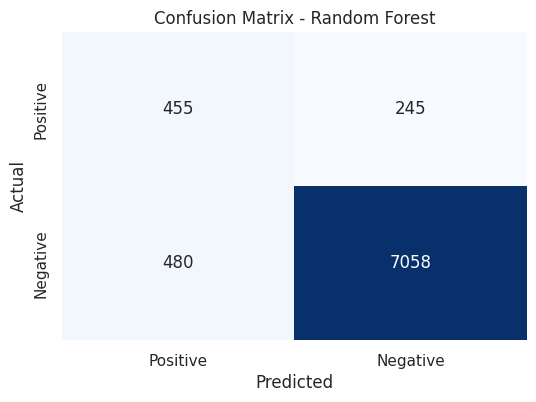

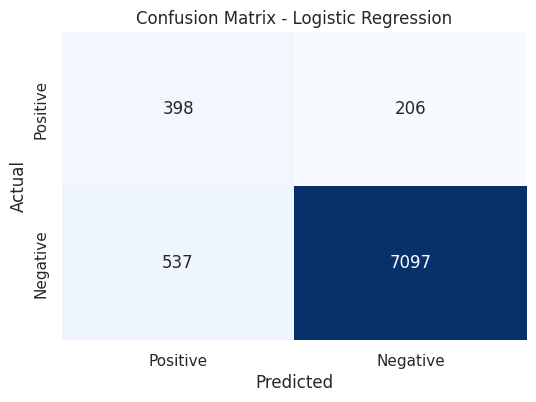

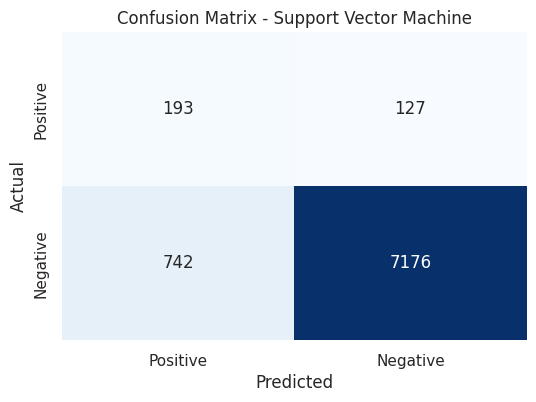

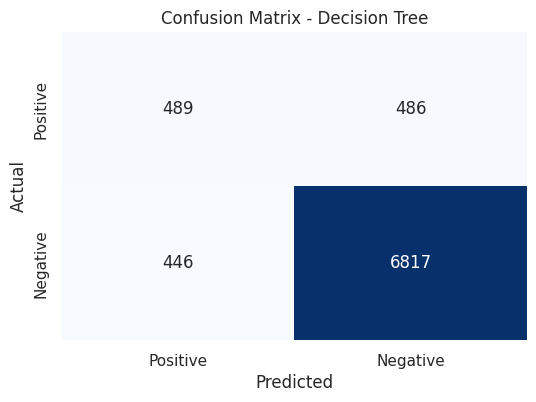

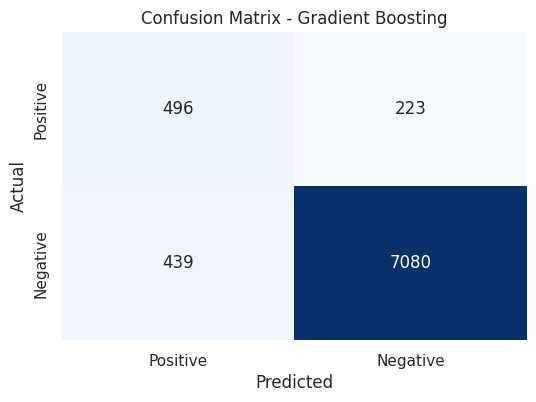

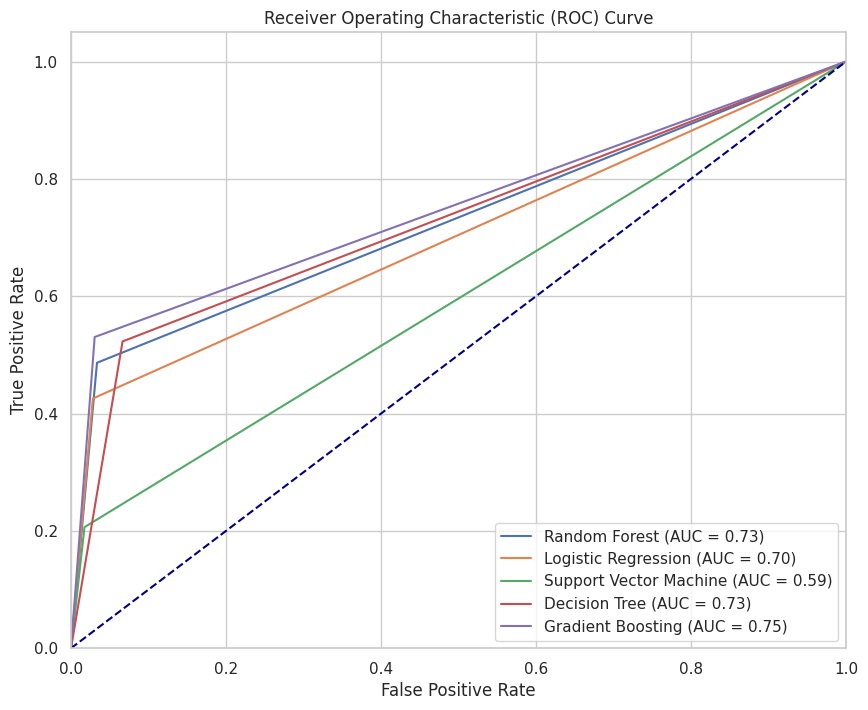

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

# Definir los modelos
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Crear una lista para almacenar los resultados de cada modelo
results = []
roc_results = {}  # Almacenar resultados de ROC y AUC

# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results.append((name, accuracy, precision, recall, tn, fp, fn, tp))

    # Calcular la curva ROC y el AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    roc_results[name] = (fpr, tpr, roc_auc)

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'TN', 'FP', 'FN', 'TP'])
print(results_df)

# Visualizar las matrices de confusión con TN, TP, FP y FN
for _, row in results_df.iterrows():
    model_name = row['Model']
    tp, fp, fn, tn = row['TP'], row['FP'], row['FN'], row['TN']
    cm_display = [[tp, fp], [fn, tn]]
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_display, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Graficar las curvas ROC
plt.figure(figsize=(10, 8))
for name, (fpr, tpr, roc_auc) in roc_results.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
best_model = results_df.loc[results_df['Accuracy'].idxmax()]

print("Mejor modelo:")
print(best_model)

Mejor modelo:
Model        Gradient Boosting
Accuracy              0.919641
Precision             0.689847
Recall                0.530481
TN                        7080
FP                         223
FN                         439
TP                         496
Name: 4, dtype: object


# Recomendaciones:

Ajuste del Umbral de Clasificación:

1. Dada la baja tasa de recall observada, se recomienda ajustar el umbral de clasificación para mejorar la sensibilidad del modelo. Esto permitirá capturar un mayor número de verdaderos positivos, lo cual es crucial para no perder clientes potencialmente interesados en productos de depósito a plazo.

2. Análisis de Importancia de las Características:

Se debe realizar un análisis profundo de la importancia de las características para identificar qué variables tienen el mayor impacto en las predicciones. Este análisis ayudará a determinar si algunas características están siendo sub o sobreestimadas por el modelo, proporcionando una base para ajustes y mejoras.

3. Optimización de Hiperparámetros:

Se necesita implementar una búsqueda exhaustiva de parámetros, como la tasa de aprendizaje y el número de árboles, usando técnicas como la búsqueda en cuadrícula (Grid Search) para encontrar la configuración óptima que mejore las métricas del modelo.  Esta estrategia está orientada a encontrar la configuración óptima que podría mejorar significativamente las métricas de precisión y recall.


4. Validación Cruzada:

Para garantizar que el modelo es robusto y generalizable, se recomienda realizar validación cruzada. Esto ayudará a evitar el sobreajuste y asegurará que el modelo puede adaptarse a nuevos datos o tendencias emergentes sin perder precisión.